# Decision Tree & Random Forest

We are going to predict once again if a passenger on the Titanic is going to survive or not using decision trees and random forests this time: 

1. Read your Titanic dataset as usual: Training set and Testing set Apply decision tree. 
2. Plot your decision tree and try to read the tree branches and conclude a prediction manually.
3. Change the decision tree parameters(change at least two parameters), 
4. Calculate the new accuracy and compare it with the previous results. 
5. Use random forest then change the number of estimators
6. Calculate the new accuracy and compare it with the previous result.

# Reading & Preprocessing Dataset

In [59]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.metrics import accuracy_score 
train=pd.read_csv (r'C:\Users\Mehdi Zribi\Desktop\AI\18- Decision Tree\train.csv')
test= pd.read_csv (r'C:\Users\Mehdi Zribi\Desktop\AI\18- Decision Tree\test.csv')

In [60]:
def preprocess_data (data):
    new_dataFrame = pd.DataFrame()
    
    new_dataFrame ['Age'] = data.Age.fillna(data.Age.mean())
    new_dataFrame ['Sex'] = pd.Series([1 if s == 'male' else  0 for s in data.Sex], name = 'Sex')
    
    return new_dataFrame
train_data= preprocess_data(train)
test_data= preprocess_data(test)

In [61]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [71]:
dict1={
    "female":1,
    "male":0,
    "No":0,
    "Yes":1
}
train.replace(dict1, inplace=True)

In [72]:
train["Age"].fillna(train["Age"].mean(), inplace=True)
train["Cabin"].describe()
train["Cabin"].fillna("B96 B98", inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [73]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.50000,0,0,330911,7.8292,B96 B98,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.00000,1,0,363272,7.0000,B96 B98,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.00000,0,0,240276,9.6875,B96 B98,Q
3,895,3,"Wirz, Mr. Albert",0,27.00000,0,0,315154,8.6625,B96 B98,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.00000,1,1,3101298,12.2875,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,30.27259,0,0,A.5. 3236,8.0500,B96 B98,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.00000,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,B96 B98,S
416,1308,3,"Ware, Mr. Frederick",0,30.27259,0,0,359309,8.0500,B96 B98,S


In [74]:
dict1={
    "female":1,
    "male":0,
    "No":0,
    "Yes":1
}
test.replace(dict1, inplace=True)

In [75]:
test["Age"].fillna(test["Age"].mean(), inplace=True)
test["Cabin"].describe()
test["Cabin"].fillna("B96 B98", inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


# Applyin for Decision Tree 

In [76]:
train_labels = train.Survived
classifier = tree.DecisionTreeClassifier()
classifier.fit(train_data , train_labels)
predicted = classifier.predict(test_data)
print("score:{}" .format(classifier.score(train_data , train_labels)))

score:0.819304152637486


# 2- Plotting the Decision Tree

In [77]:
from pandas import DataFrame , Series
from sklearn import tree
import graphviz 
from graphviz import Source
from IPython.display import display
from IPython.display import SVG
from os import system

In [78]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image  
import pydotplus

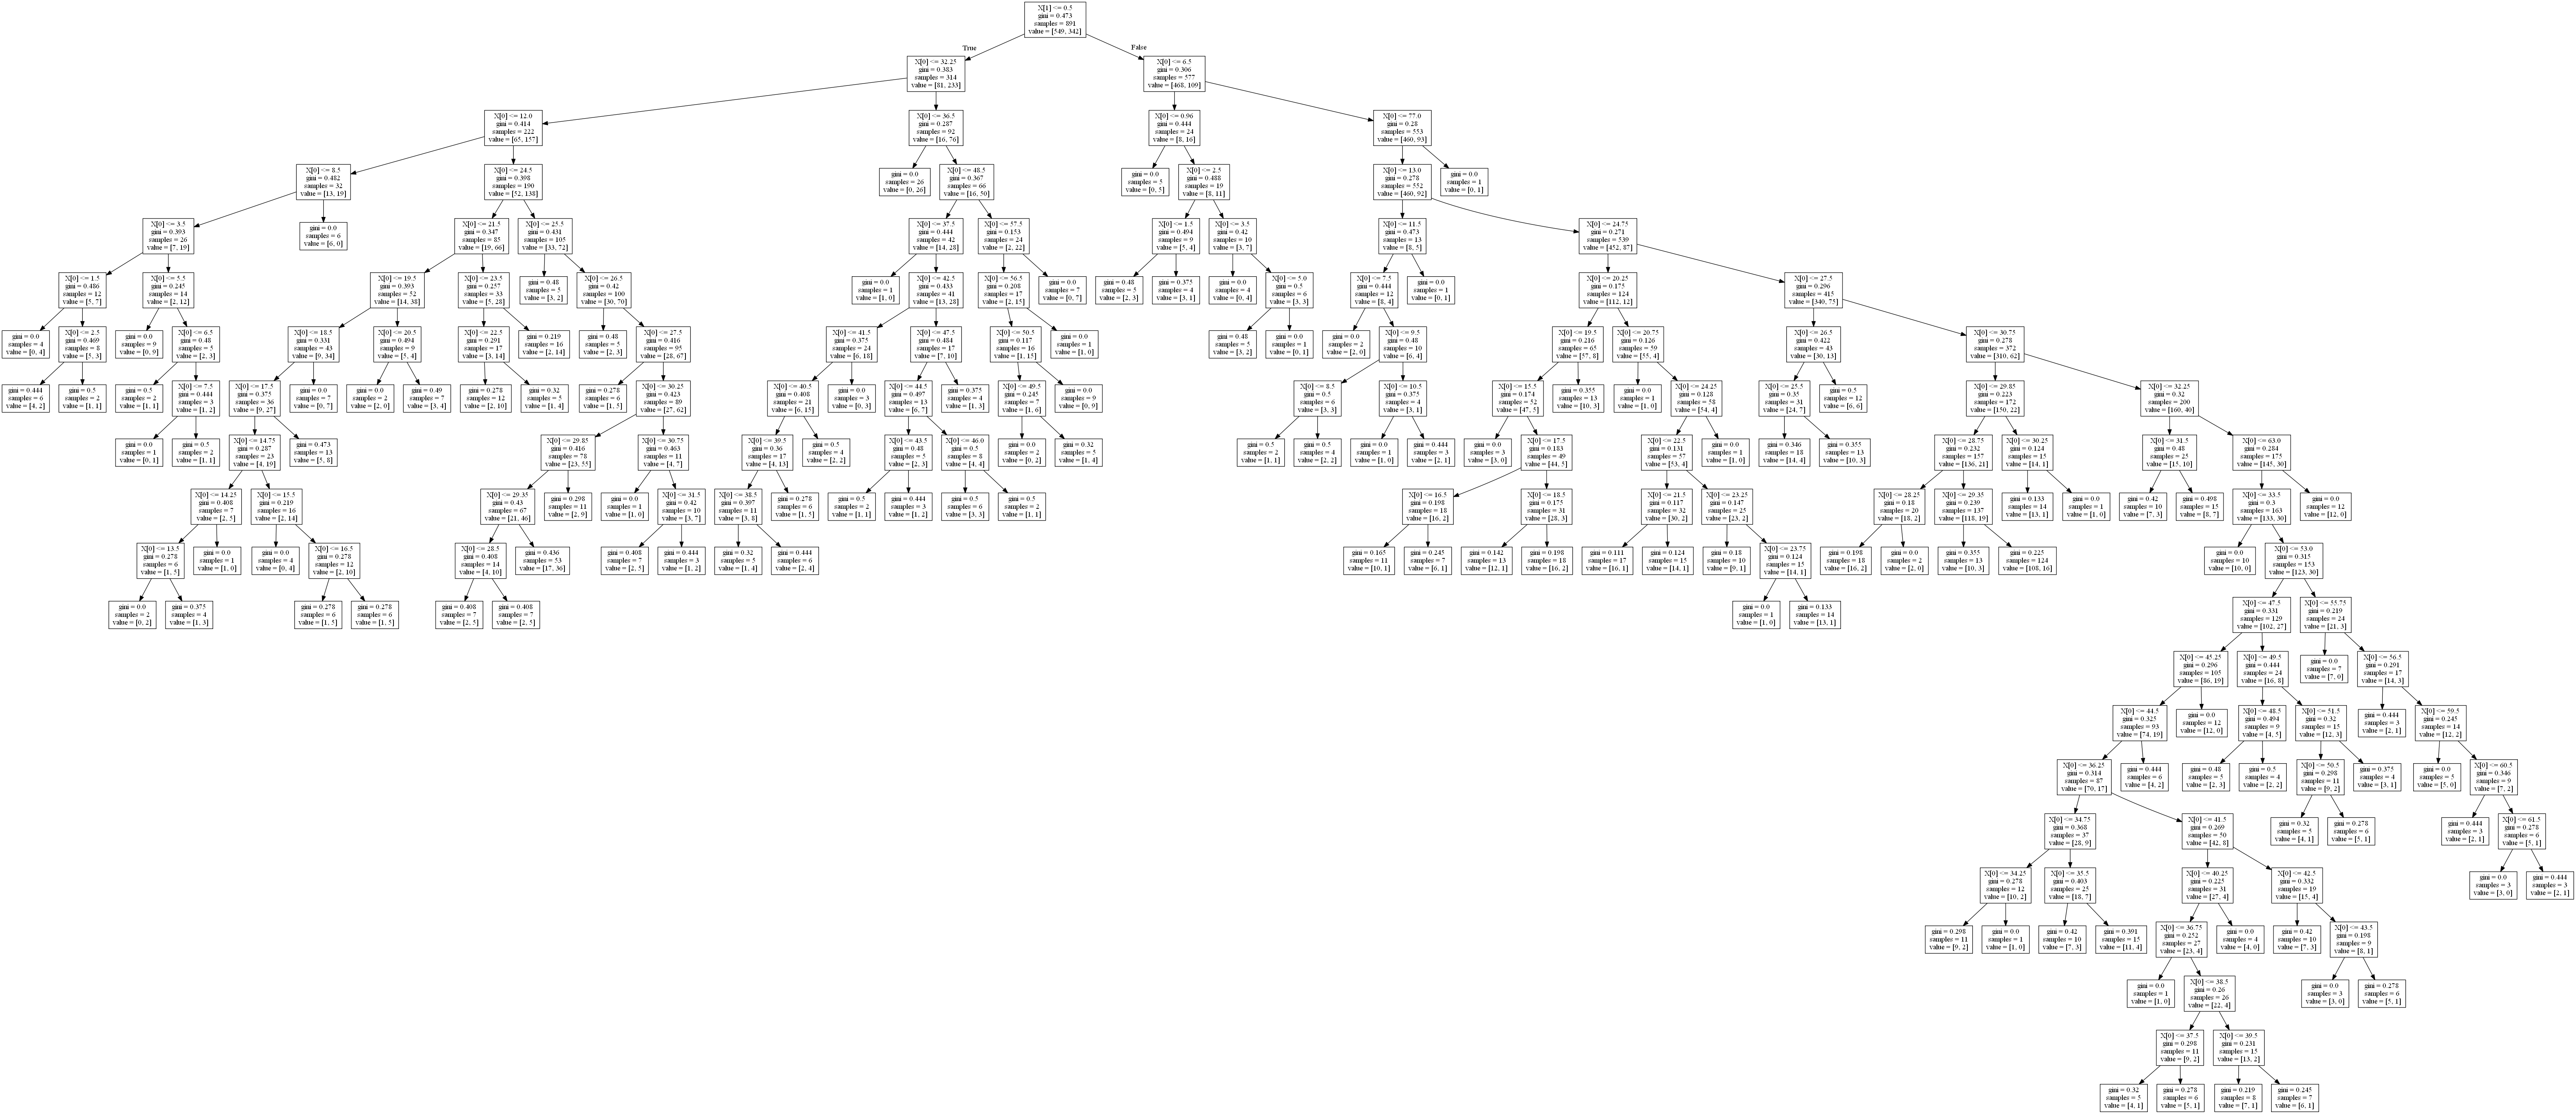

In [79]:
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('data')
Image(graph.create_png())

# Interpret

As we can observe from the first three branches the gini score in the first internal node is 0.473 however;

when the decison tree is true the gini score is 0.383 which mean the purity of the leaf / node increase "compering to internal node".
when the Decision Tree is false in the first branche the gini score is 0.306 which mean the impurity of the leaf / node decrease.
the third branche relevant to false decision shows another level of purity by 0.28 leaf / node which the samples contined whithin that node belong to the same classes.

# Conclusion

For the last fourth leafnodes we can observe that gini score is classed between 0.32 , 0.278 , 0.219 & 0.245 and the samples are between 5, 6 , 7, & 8 so we can conclude that the samples contined whithin each node belong to the same classes since the values are also between [4,1] , [5,1] , [7,1] , [6,1]

# 3 - New Accuracy

In [80]:
train=train.drop(["PassengerId","Name", "Cabin","Embarked","Ticket"],axis=1)

In [81]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [82]:
from sklearn.model_selection import train_test_split

x=train[['Pclass' ,'Sex' , 'Age' , 'SibSp' , 'Parch' , 'Fare' ]]
y=train['Survived']

x_train, x_test, y_train, y_test, = train_test_split(x,y,test_size =0.3)

In [83]:
dtree = tree.DecisionTreeClassifier()
dtree.fit(x_train, y_train)  
pred = dtree.predict(x_test)
print("score:{}" .format(dtree.score(x_test , y_test))) 

score:0.8059701492537313


# 4- RandomForest

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

clf = RandomForestClassifier(n_estimators =100)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print ("Accuracy:" , metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8507462686567164


In [90]:
clf = RandomForestClassifier(n_estimators =10)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print ("Accuracy:" , metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8395522388059702


When the number of estimators was reduced to 10 the accuraccy was decreased from 0.85 to 0.83 which means more number of decision tree generated high degree of accuracy for randomforest 